In [2]:
import pandas as pd

FILE = 'Wholesale customers data.csv'

df_raw = pd.read_csv(FILE)
print(df_raw.head(2))
print()
print(df_raw.isna().sum())

df_raw = df_raw.drop(['Channel', 'Region'], axis=1)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df_raw.to_numpy()), columns=df_raw.columns.to_list())
print(df.head(5))

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


Text(0, 0.5, 'Inertia')

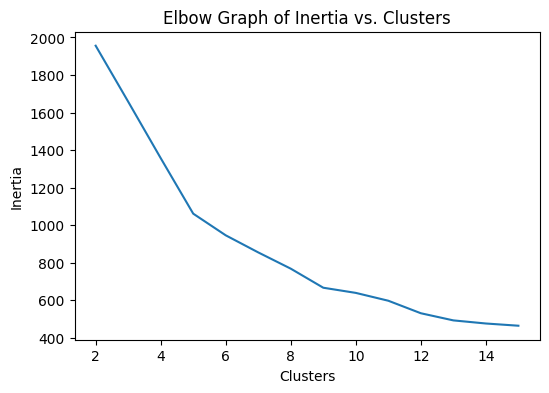

In [ ]:
from sklearn.cluster import KMeans

inertia = {}
for k in range(2,16):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    inertia[k] = kmeans.inertia_

import matplotlib.pyplot as plt
plt.subplots(figsize=(6, 4))
plt.plot(inertia.keys(), inertia.values())
plt.title('Elbow Graph of Inertia vs. Clusters')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
''' Looks like the number of clusters at the elbow is 9 (or possibly 10)'''

Text(0, 0.5, 'Davies-Bouldin Score')

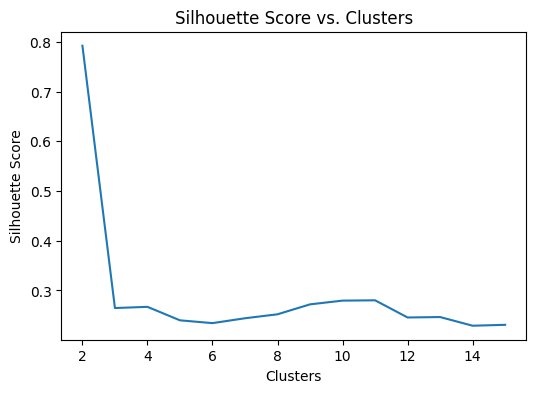

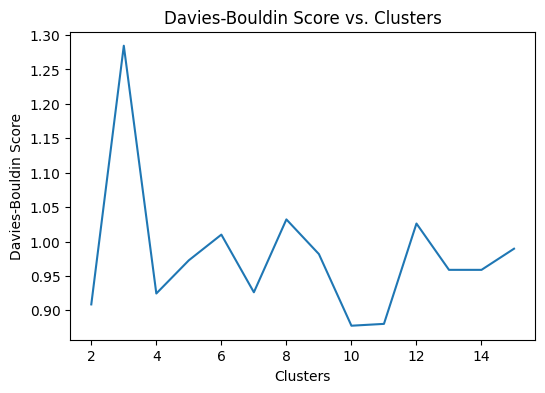

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_scores = {}
db_scores = {}
for k in range(2,16):
    ac = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(df)
    silhouette_scores[k] = silhouette_score(df, ac.labels_)
    db_scores[k] = davies_bouldin_score(df, ac.labels_)

plt.subplots(figsize=(6, 4))
plt.plot(silhouette_scores.keys(), silhouette_scores.values())
plt.title('Silhouette Score vs. Clusters')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')

plt.subplots(figsize=(6, 4))
plt.plot(db_scores.keys(), db_scores.values())
plt.title('Davies-Bouldin Score vs. Clusters')
plt.xlabel('Clusters')
plt.ylabel('Davies-Bouldin Score')
''' The agglomerative clustering results are a lot harder to interpret here. Looking at silhouette score, we have the
biggest value at 2 clusters and another peak around 11 clusters. The generally low values indicate that our clusters
have a certain amount of overlap in the 9-11 range.
Looking at Davies-Bouldin scores, we see the best values (which are the LOWEST values) at around 10-11.
Combined with the silhouette score, this would indicate that we probably have about 10-11 clusters but with overlap.
10 clusters minimizes our Davies-Bouldin score, and 11 clusters maximizes our silhouette score.

Another option would be 2 clusters only, which gives a high silhouette score and low Davies-Bouldin score.
'''